In [1]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact

In [2]:

data = pd.read_csv('movies.csv')
data.shape

(9125, 3)

In [3]:

data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:

rating = pd.read_csv('ratings.csv')


rating.shape

(100836, 4)

In [5]:

rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:

data = pd.merge(data, rating, on = 'movieId', how = 'inner')

data.shape

(96811, 6)

In [7]:

data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [8]:

data = data.drop(['movieId', 'userId', 'timestamp'], axis = 1)


data.head()

,title,genres,rating
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5
3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.5
4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5


In [9]:


data = pd.pivot_table(data, index = ['title','genres'], aggfunc = 'mean')
data.reset_index(level=['title','genres'], inplace = True)
data.head()

,title,genres,rating
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000
1,'Round Midnight (1986),Drama|Musical,3.500000
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000
3,'Til There Was You (1997),Drama|Romance,4.000000
4,"'burbs, The (1989)",Comedy,3.176471


C:\Users\rahul\AppData\Local\Temp\ipykernel_11564\3209961350.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['rating'], color = 'black')


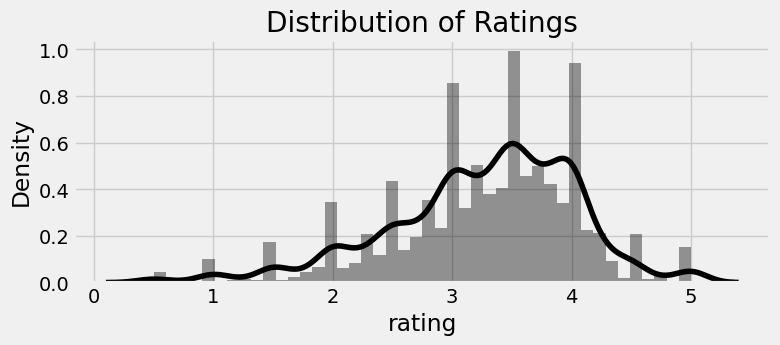

In [10]:


plt.rcParams['figure.figsize'] = (8, 3)
plt.style.use('fivethirtyeight')
sns.distplot(data['rating'], color = 'black')
plt.title('Distribution of Ratings')
plt.show()

In [12]:

data['year'] = data['year'].replace(('2007-','Despot','Things', '1975-1979','Road', ''),
                                   ('2007','2016','2016','1979','2002','1996'))


data['year'] = data['year'].astype(int)


data.head()

,title,genres,rating,year
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000,2004
1,'Round Midnight (1986),Drama|Musical,3.500000,1986
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000,2004
3,'Til There Was You (1997),Drama|Romance,4.000000,1997
4,"'burbs, The (1989)",Comedy,3.176471,1989


In [13]:

data['title'] = data['title'].str.split(' ')
data['title'] = data['title'].apply(lambda x: ' '.join(x[:-1]))



data.head()

,title,genres,rating,year
0,'Hellboy': The Seeds of Creation,Action|Adventure|Comedy|Documentary|Fantasy,4.000000,2004
1,'Round Midnight,Drama|Musical,3.500000,1986
2,'Salem's Lot,Drama|Horror|Mystery|Thriller,5.000000,2004
3,'Til There Was You,Drama|Romance,4.000000,1997
4,"'burbs, The",Comedy,3.176471,1989


In [14]:

data[data['year'] == 2016][['title','rating']].sort_values(by = 'rating',
                ascending = False).head(10).reset_index(drop = True).style.background_gradient(cmap = 'Wistia')

,title,rating
0,Ice Age: The Great Egg-Scapade,5.000000
1,Piper,4.500000
2,Pride and Prejudice and Zombies,4.500000
3,Shin Godzilla,4.000000
4,Zootopia,3.890625
5,Sherlock: The Abominable Bride,3.850000
6,Deadpool,3.833333
7,The Nice Guys,3.833333
8,Sing Street,3.833333
9,10 Cloverfield Lane,3.678571


In [15]:


print("The Number of Movies that received 5 Star Reviews :", data[data['rating'] == 5]['title'].count())
print("Percentage of Movies Getting 5 Star Reviews : {0:.2f}%".format((data[data['rating'] == 5]['title'].count())/
                                                                      (data.shape[0])))
print("\nThe Number of Movies that received less than 1 Star Reviews :", data[data['rating'] <= 1]['title'].count())
print("The Percentage of Movies Getting Less than 1 Star Reviews : {0:.2f}%".format((
    data[data['rating'] <= 1]['title'].count())/(data.shape[0])))

The Number of Movies that received 5 Star Reviews : 108
Percentage of Movies Getting 5 Star Reviews : 0.02%

The Number of Movies that received less than 1 Star Reviews : 115
The Percentage of Movies Getting Less than 1 Star Reviews : 0.02%


In [16]:


@interact
def genre(Genre = ['Action', 'Adventure', 'Animation','Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance','Sci-Fi', 'Thriller', 'War', 'Western'], year = 2000):
    x = data['genres'].str.split('|')
    d = data.drop(['genres'], axis = 1)
    x = pd.concat([d, x], axis = 1)
    x = x.explode('genres')
    x= x[(x['genres'] == Genre) & (x['year'] >= year)][['title', 'rating', 'year']].sort_values(by = 'rating',
                            ascending = False).reset_index(drop = True).head(10)
    return x

interactive(children=(Dropdown(description='Genre', options=('Action', 'Adventure', 'Animation', 'Children', '…

In [17]:
from mlxtend.preprocessing import TransactionEncoder


genres = data['genres'].str.split('|')
te = TransactionEncoder()
genres = te.fit_transform(genres)
genres = pd.DataFrame(genres, columns = te.columns_)

genres.head(2)

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,False,True,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False


In [18]:

genres = genres.astype('int')
genres.insert(0, 'title', data['title'])
genres.head(2)

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,'Hellboy': The Seeds of Creation,0,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,'Round Midnight,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [19]:

genres = genres.transpose()
genres = genres.rename(columns = genres.iloc[0])
genres = genres.drop(genres.index[0])
genres = genres.astype(int)


genres.head(2)

,'Hellboy': The Seeds of Creation,'Round Midnight,'Salem's Lot,'Til There Was You,"'burbs, The",'night Mother,(500) Days of Summer,*batteries not included,...And Justice for All,1-900 (06),...,Zoom,Zootopia,Zulu,Zulu,[REC],eXistenZ,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
(no genres listed),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,0,0


In [20]:


@interact
def recommendation_movie(movie = list(genres.columns)):    
    similar_movies = genres.corrwith(genres[movie])
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(20)

interactive(children=(Dropdown(description='movie', options=("'Hellboy': The Seeds of Creation", "'Round Midni…